In [1]:
import numpy as np
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [2]:
q = QuantumRegister(7)
c = ClassicalRegister(7)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.h(q[1])
circuit.h(q[2]) #Carry out
circuit.ccx(0,1,3)
circuit.cx(0,1)
circuit.ccx(1,2,3) #I1 = A+B+Cin
circuit.cx(1,2)
circuit.cx(0,1)
circuit.ccx(0,1,4) #I2 = A and B

circuit.x(0)
circuit.x(1)
circuit.ccx(0,1,5) # I3 = A or B
circuit.x(5)
circuit.x(0)
circuit.x(1)

circuit.cx(0,6)
circuit.cx(1,6) #I4 = A xor B

circuit.measure(q,c)

In [3]:
circuit.draw()


Total count are:
0111111 -> 148
1100110 -> 128
0000100 -> 127
0000000 -> 126
1101001 -> 121
1101010 -> 120
1100101 -> 117
0111011 -> 113


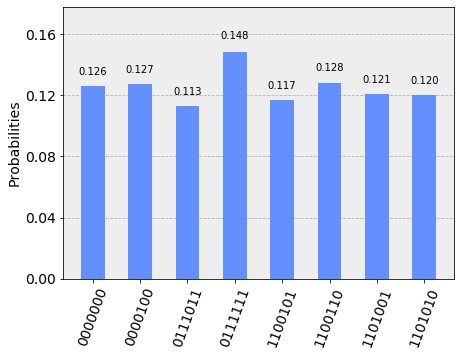

In [4]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count are:")#,counts)
sorted_x = sorted(counts.items(), key=lambda kv: kv[1],reverse=True)
import collections
sorted_dict = collections.OrderedDict(sorted_x)
for cnt in sorted_dict.keys():
    print(str(cnt)+" -> "+str(sorted_dict[cnt]))
plot_histogram(counts)

Result(backend_name='statevector_simulator', backend_version='0.3.2', date=datetime.datetime(2019, 11, 24, 19, 7, 37, 647647), header=Obj(backend_name='statevector_simulator', backend_version='0.3.2'), job_id='ec887635-9933-4847-b46f-76375fe30b08', metadata={'max_memory_mb': 4033, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.0002542}, qobj_id='bf61d3c7-df83-4e14-b2ba-cbc8099edb38', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x4=1), statevector=[0j, 0j, 0j, 0j, (1+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 

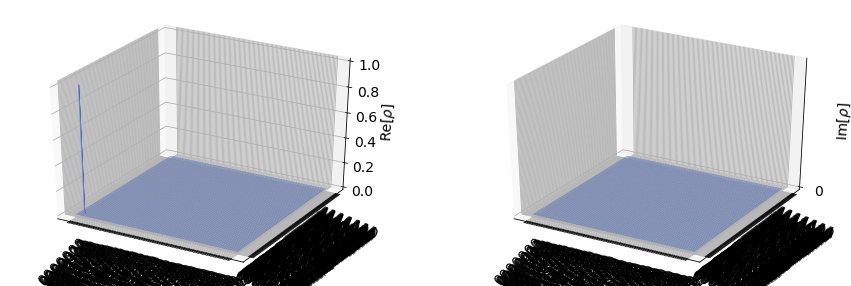

In [5]:
backend = Aer.get_backend('statevector_simulator')
job1 = execute(circuit, backend, shots=1000)
job1 = execute(circuit, backend, shots=1000)
result1 = job1.result()

print(result1)
outputstate = result1.get_statevector(circuit, decimals=3)
print(outputstate)
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)